# Project | Natural Language Processing
### News Headline: Real or Fake News

### Prepare the environment

In [6]:
# Install necessary packages
!pip install pandas numpy scikit-learn nltk spacy xgboost matplotlib seaborn transformers datasets sentence-transformers streamlit

# Setup NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Setup spaCy
import spacy.cli
spacy.cli.download("en_core_web_sm")

import spacy
nlp = spacy.load("en_core_web_sm")

# Common libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# %pip install pandas numpy scikit-learn nltk spacy xgboost matplotlib seaborn transformers datasets sentence-transformers streamlit
# from sympy import python
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# # python -m nltk.downloader stopwords punkt wordnet

# # python -m spacy download en_core_web_sm
# #%python -m spacy download en_core_web_sm
# import spacy.cli
# spacy.cli.download("en_core_web_sm")
# import spacy
# nlp = spacy.load("en_core_web_sm")

# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# # pip install pandas scikit-learn
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# import os
# from sklearn.metrics import f1_score, confusion_matrix, classification_report

- Read Data
- Reduce the training set to speead up development.

In [7]:
OUTPUT_PATH = 'predicted_validation_data_from_rev2.csv'

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
ls

data.csv  drive/  logs/  myenv/  results/  sample_data/  validation_data.csv


In [10]:
## Read training data
df = pd.read_csv(r"data.csv")
# Reduce the training set to speed up development.
print(df.head())
print(df['label'].value_counts())
print(df.isnull().sum())

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
label
1    19999
0    19943
Name: count, dtype: int64
la

# New Section

In [11]:
## Read validation data
val_data = pd.read_csv(r"validation_data.csv")
val_data.head(10)

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"
5,2,Flames raced along train at west London statio...,LONDON (Reuters) - Flames engulfed one carriag...,worldnews,"September 15, 2017"
6,2,London police advise people to avoid area near...,LONDON (Reuters) - British police on Friday ad...,worldnews,"September 15, 2017"
7,2,London ambulance service sends hazardous area ...,LONDON (Reuters) - London s ambulance service ...,worldnews,"September 15, 2017"
8,2,Witness says injured in stampede at London sta...,LONDON (Reuters) - A woman at London s Parsons...,worldnews,"September 15, 2017"
9,2,UK says world will stand together against Nort...,LONDON (Reuters) - Britain said on Friday the ...,worldnews,"September 15, 2017"


## Split

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['label']
)



Preprocess Text with spaCy + NLTK

In [ ]:
# import re
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# spacy.cli.download("en_core_web_sm")
# nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger"])

# def preprocess_text(text, remove_named_entities=True):
#     text = text.lower()
#     text = re.sub(r'[^a-z\s]', '', text)
#     doc = nlp(text)
#     ents = set(ent.text.lower() for ent in doc.ents) if remove_named_entities else set()
#     tokens = [
#         token.lemma_ for token in doc
#         if token.lemma_ not in stop_words
#         and token.is_alpha
#         and token.text.lower() not in ents
#     ]
#     return ' '.join(tokens)

In [ ]:
# from tqdm import tqdm
# tqdm.pandas()

# def preprocess_texts(texts, remove_named_entities=True):
#     results = []
#     for doc in tqdm(nlp.pipe(texts, batch_size=50), total=len(texts)):
#         ents = set(ent.text.lower() for ent in doc.ents) if remove_named_entities else set()
#         tokens = [
#             token.lemma_ for token in doc
#             if token.lemma_ not in stop_words
#             and token.is_alpha
#             and token.text.lower() not in ents
#         ]
#         results.append(' '.join(tokens))
#     return results

# # Apply in bulk
# train_df['clean_content'] = preprocess_texts(train_df['content'])
# test_df['clean_content'] = preprocess_texts(test_df['content'])


In [19]:
from tqdm import tqdm
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger"])
def preprocess_texts_fast(texts):
    results = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50), total=len(texts)):
        tokens = [
            token.lemma_ for token in doc
            if token.lemma_ not in stop_words and token.is_alpha
        ]
        results.append(' '.join(tokens))
    return results



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [20]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "tagger"])

In [17]:
train_df['content'] = train_df['title'].fillna('') + " " + train_df['text'].fillna('')
test_df['content'] = test_df['title'].fillna('') + " " + test_df['text'].fillna('')
train_df

,label,title,text,subject,date,content
33231,0,MUST SEE: House Oversight Committee Releases M...,Crooked lying Hillary,politics,"Aug 16, 2016",MUST SEE: House Oversight Committee Releases M...
36761,0,SCALIA FOUND DEAD With ‘Pillow Over Head’ By M...,Justice Scalia appeared to be in good health p...,Government News,"Feb 15, 2016",SCALIA FOUND DEAD With ‘Pillow Over Head’ By M...
29035,0,Road Raging Texas ‘Good Guy With A Gun’ Shoot...,A University of North Texas student is in crit...,News,"January 1, 2016",Road Raging Texas ‘Good Guy With A Gun’ Shoot...
31791,0,#FireBenStein FOX NEWS’ BEN STEIN Calls Presid...,,politics,"Jan 28, 2017",#FireBenStein FOX NEWS’ BEN STEIN Calls Presid...
3419,1,Exclusive: Special counsel Mueller to probe ex...,"WASHINGTON (Reuters) - Robert Mueller, the spe...",politicsNews,"June 2, 2017",Exclusive: Special counsel Mueller to probe ex...
...,...,...,...,...,...,...
33001,0,RADICAL ANTI-GUN MUSLIM State Senator Who Was ...,"On October 20, 2015, radical Muslim State sena...",politics,"Sep 16, 2016",RADICAL ANTI-GUN MUSLIM State Senator Who Was ...
13185,1,German police check more suspicious parcels af...,BERLIN (Reuters) - German police on Monday inv...,worldnews,"December 4, 2017",German police check more suspicious parcels af...
1334,1,Mexico will only remain in NAFTA if good for n...,MEXICO CITY (Reuters) - Mexico will only remai...,politicsNews,"October 10, 2017",Mexico will only remain in NAFTA if good for n...
32958,0,TRUMP FALSELY ACCUSED OF ENCOURAGING Police to...,What Trump actually said was: Our police are a...,politics,"Sep 20, 2016",TRUMP FALSELY ACCUSED OF ENCOURAGING Police to...


In [21]:
train_df['clean_content'] = preprocess_texts_fast(train_df['content'].fillna(''))
test_df['clean_content'] = preprocess_texts_fast(test_df['content'].fillna(''))


  0%|          | 0/7989 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 7989/7989 [03:06<00:00, 42.84it/s]


In [ ]:
# # Combine and clean
# train_df['content'] = train_df['title'] + " " + train_df['text']
# test_df['content'] = test_df['title'] + " " + test_df['text']

# train_df['clean_content'] = train_df['content'].apply(preprocess_text)
# test_df['clean_content'] = test_df['content'].apply(preprocess_text)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_text = tfidf.fit_transform(train_df['clean_content'])
X_test_text = tfidf.transform(test_df['clean_content'])


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['subject_encoded'] = le.fit_transform(train_df['subject'])
test_df['subject_encoded'] = le.transform(test_df['subject'])

for df_ in [train_df, test_df]:
    df_['date'] = pd.to_datetime(df_['date'], errors='coerce')  # safely handles missing/invalid dates
    df_['year'] = df_['date'].dt.year
    df_['month'] = df_['date'].dt.month
    df_['weekday'] = df_['date'].dt.weekday

X_train_meta = train_df[['subject_encoded', 'year', 'month', 'weekday']].values
X_test_meta = test_df[['subject_encoded', 'year', 'month', 'weekday']].values


## Data Preprocessing

## Feature Engineering

In [24]:
train_df['clean_content']

,clean_content
33231,must see house oversight committee releases da...
36761,scalia found dead pillow head millionaire demo...
29035,road raging texas good guy gun shoots woman he...
31791,firebenstein fox news ben stein calls presiden...
3419,exclusive special counsel mueller probe ex tru...
...,...
33001,radical anti gun muslim state senator arrested...
13185,german police check suspicious parcels potsdam...
1334,mexico remain nafta good national interest for...
32958,trump falsely accused encouraging police racia...


In [25]:
from scipy.sparse import hstack

X_train = hstack([X_train_text, X_train_meta])
X_test = hstack([X_test_text, X_test_meta])
y_train = train_df['label']
y_test = test_df['label']

# Full dataset (for CV later)
X_all = hstack([
    tfidf.transform(train_df['clean_content']),
    train_df[['subject_encoded', 'year', 'month', 'weekday']].values
])
y_all = train_df['label']


Train Logistic Regression

In [26]:
print(train_df[['subject_encoded', 'year', 'month', 'weekday']].isnull().sum())


subject_encoded        0
year               22627
month              22627
weekday            22627
dtype: int64


In [27]:
for col in ['subject_encoded', 'year', 'month', 'weekday']:
    train_df[col] = train_df[col].fillna(0).astype(int)
    test_df[col] = test_df[col].fillna(0).astype(int)


In [28]:
X_train_meta = train_df[['subject_encoded', 'year', 'month', 'weekday']].values
X_test_meta = test_df[['subject_encoded', 'year', 'month', 'weekday']].values
X_train = hstack([X_train_text, X_train_meta])
X_test = hstack([X_test_text, X_test_meta])


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import (
    accuracy_score, f1_score,
    classification_report, confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.4993115533859056
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      3989
           1       0.00      0.00      0.00      4000

    accuracy                           0.50      7989
   macro avg       0.25      0.50      0.33      7989
weighted avg       0.25      0.50      0.33      7989

Confusion Matrix:
 [[3989    0]
 [4000    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


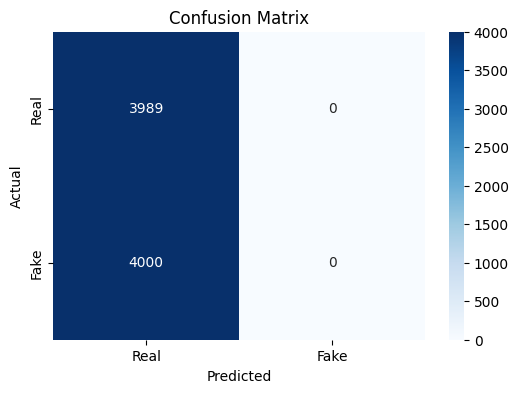

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
X_all = hstack([
    tfidf.transform(train_df['clean_content']),  # not df — use train_df
    train_df[['subject_encoded', 'year', 'month', 'weekday']].values
])
y_all = train_df['label']


In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_all, y_all, cv=skf, scoring='f1')

print("5-Fold F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))


5-Fold F1 Scores: [1.         1.         0.99953147 1.         0.99921936]
Mean F1 Score: 0.9997501658997423


Evaluation

# F1 Score

# Confusion Matrix

XGBoost

In [34]:
%pip install xgboost

In [35]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Train
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🔸 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("🔸 XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))
print("🔸 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("🔸 Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔸 XGBoost Accuracy: 1.0
🔸 XGBoost F1 Score: 1.0
🔸 Confusion Matrix:
 [[3989    0]
 [   0 4000]]
🔸 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



XG Boost cross val

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_all, y_all, cv=skf, scoring='f1')
print("🔸 XGBoost 5-Fold F1 Scores:", cv_scores_xgb)
print("🔸 Mean F1:", cv_scores_xgb.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:04:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:04:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:04:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

🔸 XGBoost 5-Fold F1 Scores: [1. 1. 1. 1. 1.]
🔸 Mean F1: 1.0


In [ ]:
##BERT

In [37]:
%pip install transformers datasets

Prepare data for BERT

In [38]:
from datasets import Dataset
from transformers import BertTokenizer

# Create datasets
bert_train_df = train_df[['clean_content', 'label']].rename(columns={'clean_content': 'text'})
bert_test_df = test_df[['clean_content', 'label']].rename(columns={'clean_content': 'text'})

train_ds = Dataset.from_pandas(bert_train_df)
test_ds = Dataset.from_pandas(bert_test_df)

# Tokenize
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

train_ds = train_ds.map(tokenize_function, batched=True)
test_ds = test_ds.map(tokenize_function, batched=True)

# Set format for PyTorch
train_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_ds.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/31953 [00:00<?, ? examples/s]

Map:   0%|          | 0/7989 [00:00<?, ? examples/s]

Fine Tune BERT

In [39]:
import transformers
print(transformers.__version__)


4.52.3


In [40]:
 !pip install --upgrade transformers

In [41]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [42]:
print(train_ds.column_names)
print(train_ds[0])


['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask']


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [43]:
train_ds.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "token_type_ids", "label"],
    output_all_columns=False
)

test_ds.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "token_type_ids", "label"],
    output_all_columns=False
)


In [44]:
train_ds = train_ds.rename_column("label", "labels")
test_ds = test_ds.rename_column("label", "labels")


In [45]:
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "token_type_ids", "labels"])
test_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "token_type_ids", "labels"])


In [46]:
!python -m venv myenv
!myenv\Scripts\activate

!pip install numpy==1.26.4 transformers datasets


Error: Command '['/content/myenv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: myenvScriptsactivate: command not found
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [47]:
print(train_ds[0])


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [48]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# training_args = TrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     logging_dir='./logs',
# )
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
)
trainer.train()


ModuleNotFoundError: Could not import module 'BertForSequenceClassification'. Are this object's requirements defined correctly?

Evaluate BERT

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

predictions = trainer.predict(test_ds)
y_pred_bert = np.argmax(predictions.predictions, axis=1)
y_true_bert = predictions.label_ids

print("🔷 BERT Accuracy:", accuracy_score(y_true_bert, y_pred_bert))
print("🔷 BERT F1 Score:", f1_score(y_true_bert, y_pred_bert))
print("🔷 BERT Classification Report:\n", classification_report(y_true_bert, y_pred_bert))


##OLD CODES for VAL DATA

In [ ]:
val_titles = val_data['title'].fillna("")
val_titles

Transform titles using the same vectorizer

In [ ]:
val_tfidf = vectorizer.transform(val_titles)

Predict labels

Replace label column

In [ ]:
val_data['label'] = predicted_labels
val_data

# Save the modified validation file

In [ ]:
val_data.to_csv(OUTPUT_PATH, index=False)

print(f"Predicted labels saved to {OUTPUT_PATH}")

cross validation